Naveen Chakicherla - Differences in derived mental health severity scores between US and non-US samples

Null hypothesis: There is no statistically significant difference between median mental health severity scores between US and non-US populations

Alternate hypothesis: The median mental health severity of the US population is less than that of populations outside of the US.

Results: 1 // The p-value obtained from our Mann-Whitney U-test exceeds our alpha value of 0.05, so we fail to reject our null hypothesis. 2 // The p-value obtained from our additional one-sided two-sample t-test exceeds our alpha of 0.05, so we fail to reject our null hypothesis
        

In [1]:
## Import Python modules as appropriate

from pathlib import Path
from numpy import number
import pandas as pd
import pprint
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
## Establish path of initial .csv data and read into DataFrame

csv_path = Path("./df_factors.csv")
orig_df = pd.read_csv(csv_path)

In [3]:
## 1. Create working_df breakout table by using groupby method and derived mental_health_severity factor

working_df = orig_df.groupby("country")["mental_health_severity"].value_counts().unstack(fill_value=0)

## 2. New column "n_points" is created to track total number of measurements per country
working_df["n_points"] = working_df.sum(axis=1)

pprint.pp(working_df)

mental_health_severity    -4    -3     -2     -1      0      1      2     3  \
country                                                                       
Australia                 98   341    767   1131   1370   1149    761   340   
Belgium                   14    45     99    155    185    163    108    43   
Bosnia and Herzegovina     6    23     53     73     90     71     47    24   
Brazil                    36   138    318    438    540    426    282   144   
Canada                   282  1003   2269   3293   4005   3313   2194  1011   
Colombia                   6    23     53     73     90     71     47    24   
Costa Rica                 6    23     53     73     90     71     47    24   
Croatia                    6    23     53     73     90     71     47    24   
Czech Republic             6    23     53     73     90     71     47    24   
Denmark                   12    46    106    146    180    142     94    48   
Finland                    6    23     53     73    

In [4]:
## 1. Proportions of each mental health score measured per country are calculated by dividing # of occurrences of each integer value by n_points for the country.
columns = working_df.columns.tolist()
for elem in columns:
    if elem in working_df.columns:
        working_df_prop = working_df.div(working_df[elem], axis=0)

## 2. For calculation of per-country mean mental health measurement, traverse range of possible integer values [-6 , 6] measured in each country. Ratios of each value are multiplied by value. and pushed to country_prop_dict.
country_prop_dict = {}

for country in working_df_prop.index:
    country_weighted_total = 0;
    for i in range(len(working_df_prop.loc[country]) - 1):

        country_weighted_total += i * working_df_prop.loc[country].iloc[i]

    country_prop_dict[country] = country_weighted_total
    country_weighted_total = 0
    
## 3. Once totals are numerated in lookup dictionary, results_df is created with country and its mean weighted mental health severity score.
results_df = pd.DataFrame(country_prop_dict.items(), columns=["country", "severity"])
pprint.pp(results_df)
print(results_df.max(axis=0))

                   country  severity
0                Australia  3.981248
1                  Belgium  4.014563
2   Bosnia and Herzegovina  3.941026
3                   Brazil  3.941026
4                   Canada  3.972089
5                 Colombia  3.941026
6               Costa Rica  3.941026
7                  Croatia  3.941026
8           Czech Republic  3.941026
9                  Denmark  3.941026
10                 Finland  3.941026
11                  France  3.941026
12                 Georgia  3.941026
13                 Germany  3.941026
14                  Greece  3.941026
15                   India  3.962870
16                 Ireland  3.962870
17                  Israel  3.941026
18                   Italy  3.941026
19                  Mexico  3.941026
20                 Moldova  3.941026
21             Netherlands  3.951306
22             New Zealand  3.971414
23                 Nigeria  3.941026
24             Philippines  3.941026
25                  Poland  4.014563
2

In [5]:
## 1. Calculate, store, and print total number of points for reference.

n_points_list = working_df["n_points"].to_list()
results_df["n_points"] = n_points_list

n_points_total = results_df["n_points"].sum(axis=0)
print("Total # of data points: " + str(n_points_total))

## 2. Calculate ratio of measurements calculate in each country, as proportion of total number of points. This is to prevent exaggeration of measurements from low-count countries when summing for comparison with US.
results_df["n_points_prop"] = results_df["n_points"].div(n_points_total, axis=0)

Total # of data points: 287162


In [6]:
## Establish new column in results_df which has mean severity rating for each country adjusted for its population as a proportion of n_points_total. Print updated table for reference.

weighted_severity_list = results_df["severity"].to_list()
n_points_prop_list = results_df["n_points_prop"].to_list()

for i in range(len(weighted_severity_list)):
    weighted_severity_list[i] = weighted_severity_list[i] * n_points_prop_list[i]

results_df["weighted_severity"] = weighted_severity_list
pprint.pp(results_df)

                   country  severity  n_points  n_points_prop  \
0                Australia  3.981248      6026       0.020985   
1                  Belgium  4.014563       824       0.002869   
2   Bosnia and Herzegovina  3.941026       390       0.001358   
3                   Brazil  3.941026      2340       0.008149   
4                   Canada  3.972089     17556       0.061136   
5                 Colombia  3.941026       390       0.001358   
6               Costa Rica  3.941026       390       0.001358   
7                  Croatia  3.941026       390       0.001358   
8           Czech Republic  3.941026       390       0.001358   
9                  Denmark  3.941026       780       0.002716   
10                 Finland  3.941026       390       0.001358   
11                  France  3.941026      2340       0.008149   
12                 Georgia  3.941026       390       0.001358   
13                 Germany  3.941026      4680       0.016297   
14                  Greec

In [7]:
## Since we know United States is the last row, we can find its severity directly. Non-US countries are enumerated using range.

n_rows = len(results_df)

us_severity = results_df.values[n_rows - 1][4]
non_us_severity = 0

for i in range(n_rows - 2):
    non_us_severity += results_df.values[i][4]

In [8]:
## Establish new working DataFrame for statistical test. Print new DF for reference.

country_score_slices_df = pd.DataFrame()
country_score_slices_df["country"] = orig_df["country"].copy()
country_score_slices_df["severity"] = orig_df["mental_health_severity"].copy()

pprint.pp(country_score_slices_df)

              country  severity
0       United States         1
1       United States         1
2              Poland         1
3           Australia         1
4       United States         1
...               ...       ...
287157  United States         1
287158   South Africa         1
287159  United States         1
287160  United States         1
287161  United States         1

[287162 rows x 2 columns]


In [9]:
## Split working DF into DFs for US and non-US measurements. These will be the samples for statistical comparison test. Print split DFs for reference.

us_df = country_score_slices_df[country_score_slices_df.country == "United States"]
non_us_df = country_score_slices_df[country_score_slices_df.country != "United States"]

print("US measurements:")
pprint.pp(us_df)
print("Non-US measurements")
pprint.pp(non_us_df)

US measurements:
              country  severity
0       United States         1
1       United States         1
4       United States         1
5       United States         1
6       United States         1
...               ...       ...
287156  United States         1
287157  United States         1
287159  United States         1
287160  United States         1
287161  United States         1

[168056 rows x 2 columns]
Non-US measurements
               country  severity
2               Poland         1
3            Australia         1
10              Canada         1
12      United Kingdom         1
14        South Africa         1
...                ...       ...
287150          Canada         1
287153          Poland         1
287154         Ireland         1
287155       Australia         1
287158    South Africa         1

[119106 rows x 2 columns]


In [10]:
## Calculate and print mean severity scores for US and non US data points.

us_avg = us_df["severity"].mean()
non_us_avg = non_us_df["severity"].mean()
print("us mean: "+ str(us_avg))
print("non-us mean: " + str(non_us_avg))

us mean: -0.03048983672109297
non-us mean: -0.03913320907426998


In [11]:
## We test for normality within our US and non-US samples. Due to the resulting low p-value, we can't conclude that the underlying population distributions are normal. Print results for reference.

us_severity_list = us_df["severity"].to_list()
non_us_severity_list = non_us_df["severity"].to_list()

print(st.normaltest(us_df[["severity"]]))
print(st.normaltest(non_us_df[["severity"]]))

NormaltestResult(statistic=array([2875.50621304]), pvalue=array([0.]))
NormaltestResult(statistic=array([2186.11473397]), pvalue=array([0.]))


In [12]:
# To establish a 95% confidence-level, alpha is set to 0.05. 
alpha = 0.05

# One-sided Mann-Whitney U-test is performed due to large data set, derived nature of our calculated mental health factor, and lack of normality in our populations. Independence between datasets is known, and distributions have similar shapes as shown in histogram below.
print(st.mannwhitneyu(us_severity_list, non_us_severity_list, alternative="less", axis=0, nan_policy="raise"))

test_stat, p_value = st.mannwhitneyu(us_severity_list, non_us_severity_list, alternative="less", axis=0, nan_policy="raise")

print("Test statistic: " + str(test_stat))
print("P-value: " + str(p_value))

## Mann-Whitney U-test tests for a difference in distribution or difference in median between populations. Because the shape of our sample data is similar for both datasets, the results of the test make inferences on a difference in median.
##
## The high p-value suggests that at our confidence level of 95%, we fail to reject the null-hypothesis, and conclude that there is no statistically significant difference in median mental health severity between US and non-US popualtions.

MannwhitneyuResult(statistic=10038884674.0, pvalue=0.9224106675887707)
Test statistic: 10038884674.0
P-value: 0.9224106675887707


In [13]:
if p_value < alpha:
    print("Reject Null Hypothesis: P-value is less than alpha, so null-hypothesis is rejected. There is a statistically significant difference between median mental health severity of US and non-US populations.")
else:
    print("Fail to reject Null Hypothesis: P-value is greater than alpha, so we fail to reject our null hypothesis. There is no statistically significant difference between median mental health severity of US vs non-US populations")

Fail to reject Null Hypothesis: P-value is greater than alpha, so we fail to reject our null hypothesis. There is no statistically significant difference between median mental health severity of US vs non-US populations


In [14]:
## Despite the non-normality of our distributions, a one-sided two-sample independence t-test can be performed
## due to the large sample sizes.
## 
## The sampling distribution of the populations would approximate normality when the sample size is large enough. 

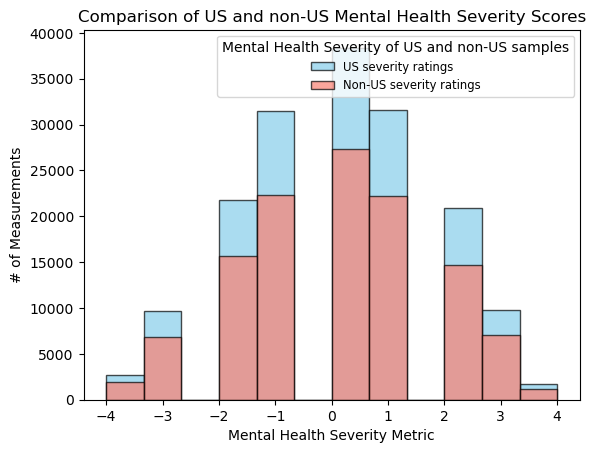

In [15]:
## Create histogram representing distribution of mental health severity scores for US and non-US samples.
plt.hist(us_severity_list, bins=12, edgecolor="black", color="skyblue", alpha=0.7, label="US severity ratings")
plt.hist(non_us_severity_list, bins=12, edgecolor="black", color="salmon", alpha=0.7, label="Non-US severity ratings")

## Establish labels for axes and legend for differentiation of plotted distributions.
plt.xlabel("Mental Health Severity Metric")
plt.ylabel("# of Measurements")
plt.title("Comparison of US and non-US Mental Health Severity Scores")

## Render graphic.
plt.legend(title="Mental Health Severity of US and non-US samples", fontsize="small")
plt.show()

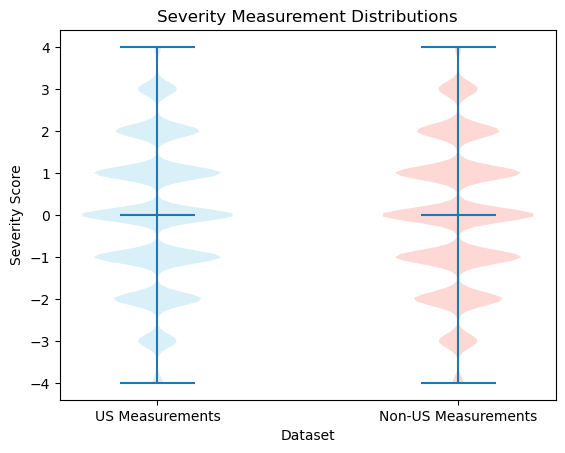

In [16]:
## Create side-by-side violin plots representing distribution of mental health severity scores for US and non-US samples. Plots show similar comparison as histrogram but more specificity. Not as helpful due to ordinal nature of measurements.
fig, ax = plt.subplots()

parts = ax.violinplot([us_severity_list, non_us_severity_list], showmeans=False, showmedians=True)

## Apply similar colors as histogram.
colors = ['skyblue', 'salmon', 'lightgreen']
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])

## Apply labels to different plots.
ax.set_xlabel('Dataset')
ax.set_ylabel('Severity Score')
ax.set_title('Severity Measurement Distributions')

## Customize x-axis labels to differentiate populations.
ax.set_xticks([1, 2])
ax.set_xticklabels(['US Measurements', 'Non-US Measurements'])

## Render graphic.
plt.show()

In [17]:
## Conclusions - Both statistical tests resulted in p-values which exceeded our alpha = 0.05.
##
## We observed no statistically significant difference in median or mean mental health severity score 
## of the US and non-US populations.
##
## Future examinations of similar data to answer questions related to mental health can be improved by -
## - ensuring that samples are more randomly collected rather than non-random surveys
## - establishing a higher-quality metric whose distribution and/or normality are known